- Shay Korhorn
- Spring 2024
- Time Tracking Assignment
- February 16

# In class Assignment- 
Analyzing your `time sheet` using Pandas, Matplotlib and Seaborn modules.Save this file as InClassAssignment_Timesheet_xxxx where xxxx will be your initials
- Name:
- Date:
- Version: 

### Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### Load the dataset and save it to a dataframe named 'df'
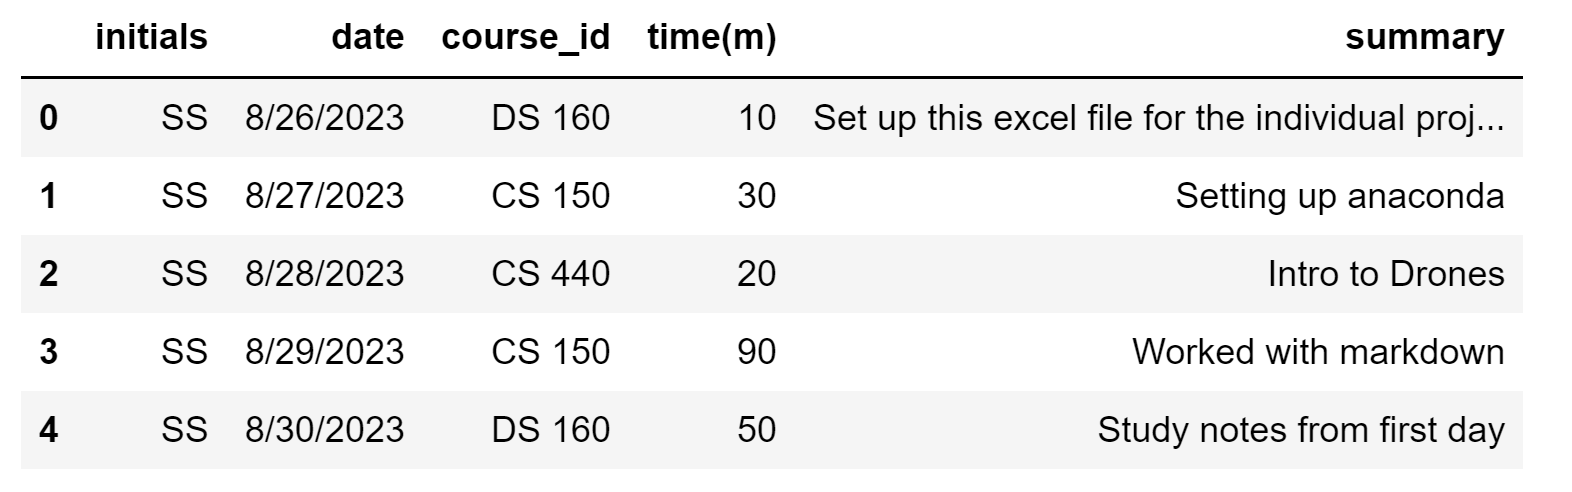

In [2]:
# Loading the data
df=pd.read_csv("Data Accumulated Over Spring Sem.csv")
df.head()

,Initials,Date,Class ID,Time,Summary
0,SK,1/8/24,ACCT,50,Introduction to course and syllabus
1,SK,1/9/24,DS,75,"First day of Class, completed the introduction..."
2,SK,1/9/24,BUSA,75,"First day of Class, completed lab 1 during cla..."
3,SK,1/10/24,ACCT,50,"Quiz on syllabus, then got into introduction n..."
4,SK,1/10/24,STUDY,120,Studied introduction notes from ACCT-102


### Investigate your dataset (head, tail, info)
- How many entries in your dataset?
- Is there any missing value?
- What are the data types?

In [3]:
df.head()

,Initials,Date,Class ID,Time,Summary
0,SK,1/8/24,ACCT,50,Introduction to course and syllabus
1,SK,1/9/24,DS,75,"First day of Class, completed the introduction..."
2,SK,1/9/24,BUSA,75,"First day of Class, completed lab 1 during cla..."
3,SK,1/10/24,ACCT,50,"Quiz on syllabus, then got into introduction n..."
4,SK,1/10/24,STUDY,120,Studied introduction notes from ACCT-102


In [4]:
df.tail()

,Initials,Date,Class ID,Time,Summary
49,SK,2/9/24,STATS,50,Continued Chapter 2 homework
50,SK,2/12/24,ACCT,50,Quiz on Chapter 4 Notes and Lecture
51,SK,2/13/24,DS,75,Python notes on seaborn
52,SK,2/13/24,BUSA,75,Lab and begin creating our websites
53,SK,2/14/24,ACCT,50,Quiz on what we have learned


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Initials  54 non-null     object
 1   Date      54 non-null     object
 2   Class ID  54 non-null     object
 3   Time      54 non-null     int64 
 4   Summary   54 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.2+ KB


In [6]:
df.sample(6)

,Initials,Date,Class ID,Time,Summary
35,SK,2/1/24,DS,75,Python notes
25,SK,1/25/24,DS,75,Started in class group assignment and python n...
38,SK,2/2/24,ENGL,80,Powerpoint slides and take notes
24,SK,1/24/24,STUDY,60,Studied Accounting and stats notes
43,SK,2/7/24,ACCT,50,Chapter 4 Notes and Lecture
22,SK,1/23/24,BUSA,75,Lab and Quiz


In [7]:
df["Class ID"].value_counts()

ACCT     17
DS       11
BUSA     11
STUDY     5
ENGL      5
STATS     5
Name: Class ID, dtype: int64

### Summary Statistics
Calculate basic statistics for the 'Time (minutes)' column, such as mean, median, minimum, and maximum. This will give you an overview of how time is distributed across activities. use table and graphical representations (sample below)
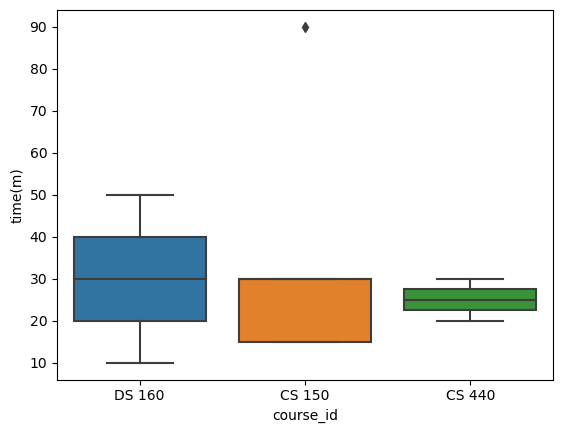

In [16]:
from datetime import datetime

In [19]:
df['Time'].describe()

count     54.000000
mean      63.703704
std       18.611854
min       20.000000
25%       50.000000
50%       72.500000
75%       75.000000
max      120.000000
Name: Time, dtype: float64

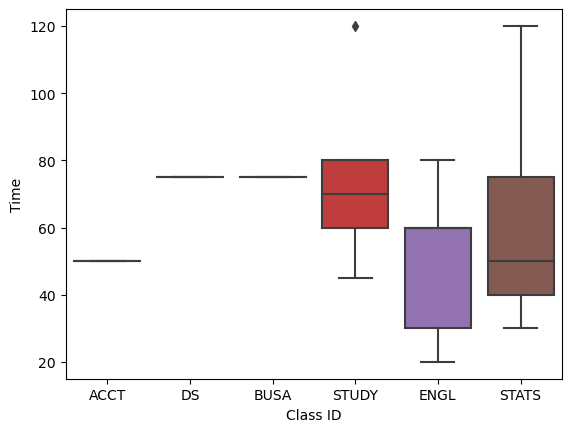

In [8]:
sns.boxplot(x="Class ID",
           y="Time",
           data=df)
plt.show()

### Create two new columns "day" and "day_name" using the "Date" column in which the day will represent the range of days (sample below)
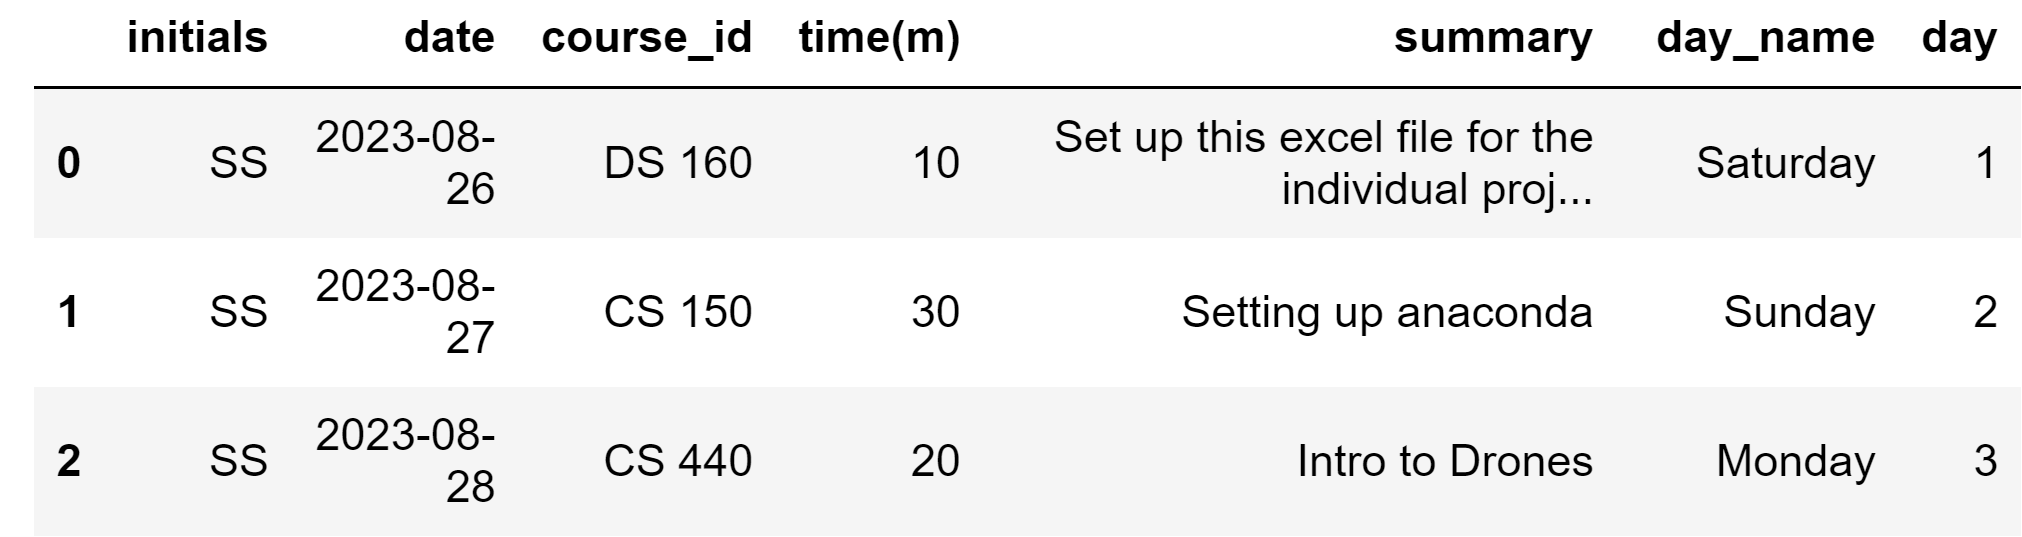
- df['day'] = range(1, len(df) + 1)

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['day'] = range(1, len(df) + 1)
df['day_name']=df['Date'].dt.day_name()

In [10]:
df.head()

,Initials,Date,Class ID,Time,Summary,day,day_name
0,SK,2024-01-08,ACCT,50,Introduction to course and syllabus,1,Monday
1,SK,2024-01-09,DS,75,"First day of Class, completed the introduction...",2,Tuesday
2,SK,2024-01-09,BUSA,75,"First day of Class, completed lab 1 during cla...",3,Tuesday
3,SK,2024-01-10,ACCT,50,"Quiz on syllabus, then got into introduction n...",4,Wednesday
4,SK,2024-01-10,STUDY,120,Studied introduction notes from ACCT-102,5,Wednesday


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Initials  54 non-null     object        
 1   Date      54 non-null     datetime64[ns]
 2   Class ID  54 non-null     object        
 3   Time      54 non-null     int64         
 4   Summary   54 non-null     object        
 5   day       54 non-null     int64         
 6   day_name  54 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 3.1+ KB


### Data Visualization:
1. Create a histogram to visually represent the distribution of time spent.
2. Create a  bar chart (sample below) to visually represent the distribution of time spent on different courses and comment on the course you spent most and least time
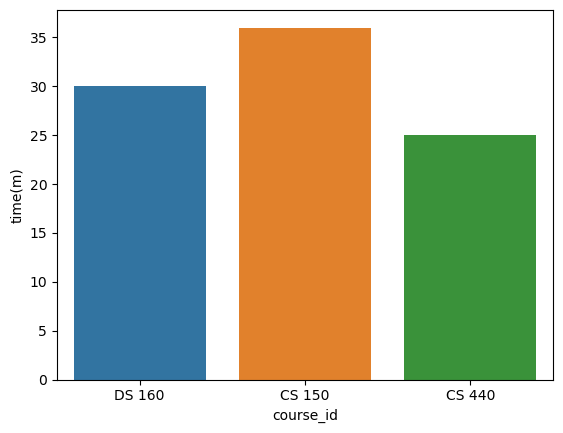

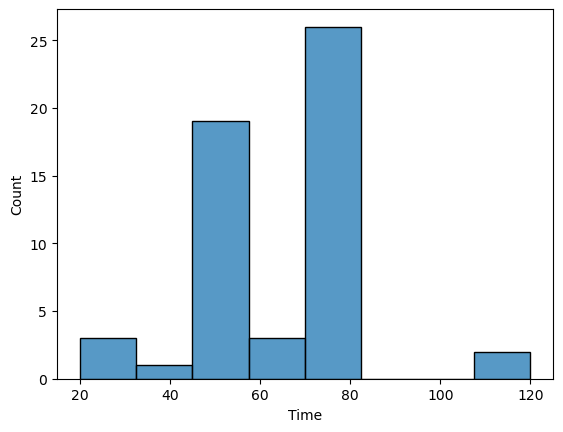

In [11]:
sns.histplot(x="Time",
            data=df)
plt.show()

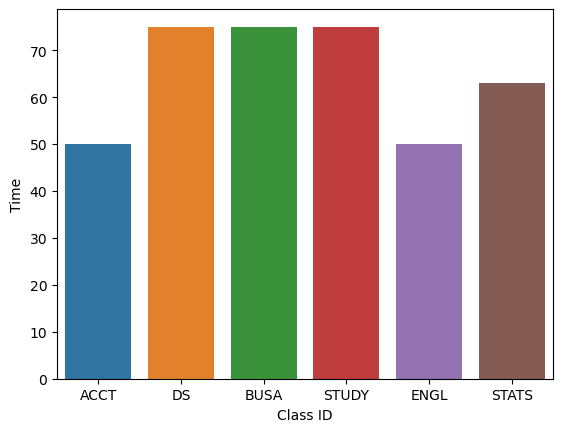

In [12]:
sns.barplot(x="Class ID",
           y="Time",
            errorbar=None,
           data=df)

plt.show()

In [23]:
total_time_df = df.groupby('Class ID')['Time'].sum().reset_index()

In [24]:
total_time_df

,Class ID,Time
0,ACCT,850
1,BUSA,825
2,DS,825
3,ENGL,250
4,STATS,315
5,STUDY,375


<Axes: xlabel='Class ID', ylabel='Time'>

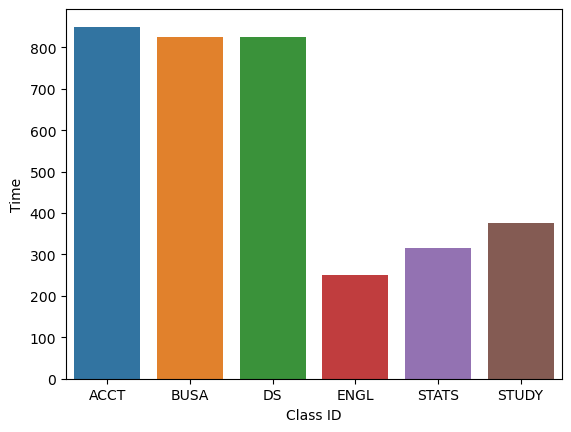

In [25]:
sns.barplot(x='Class ID', y='Time', data=total_time_df, ci=False)

### Activity Counts:

Count the occurrences of each course in the dataset to see `how often` you engaged in each.

In [13]:
df["Class ID"].value_counts()

ACCT     17
DS       11
BUSA     11
STUDY     5
ENGL      5
STATS     5
Name: Class ID, dtype: int64

- I engaged in Accounting the most with 17 occurrences, then Data Science and Business classes with 11 occurrences each, next Studying, English, and Statistics with all having 5 occurrences.

### Time Trends:

Plot a line chart (sample below) to visualize how time spent on activities changes over the observed days.
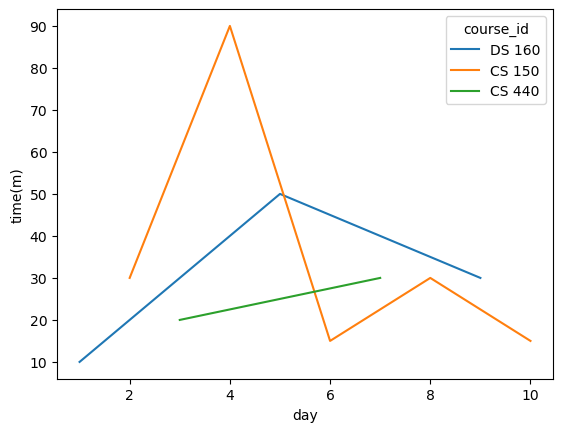

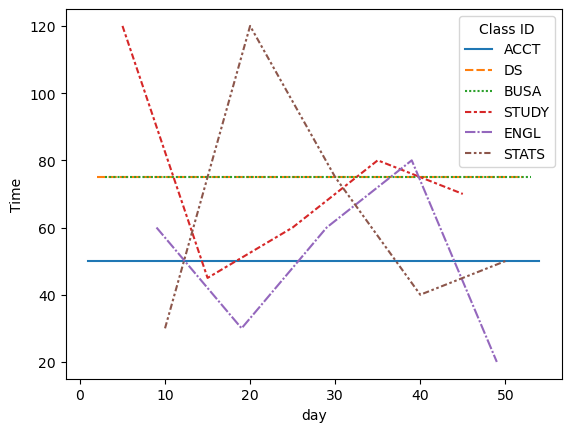

In [14]:
sns.lineplot(x="day",
            y="Time",
             hue="Class ID",
             errorbar=None,
             style="Class ID",
            data=df)
plt.show()

<Axes: xlabel='Date', ylabel='Time'>

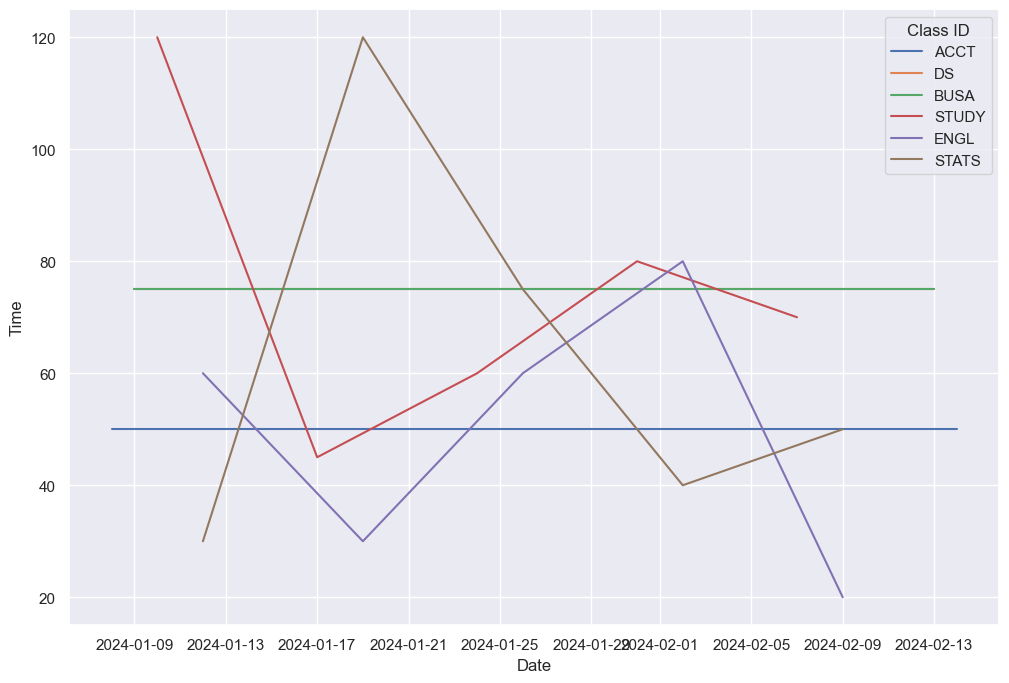

In [27]:
sns.set(rc={"figure.figsize": (12, 8)}) 
sns.lineplot(x='Date', y='Time', data=df,hue='Class ID')

### Course Analysis:

For each course ex.(DS 160, CS 150, CS 440), calculate the total time spent. Which course received the most time, and which received the least?
- Sample print statement: Total time spent on CS160: 180 min

In [28]:
df.groupby('Class ID')['Time'].sum()

Class ID
ACCT     850
BUSA     825
DS       825
ENGL     250
STATS    315
STUDY    375
Name: Time, dtype: int64

### Correlations:
- Examine whether there are any correlations between the day and the time spent. For example, do you spend more time on courses over days or less (sample below).
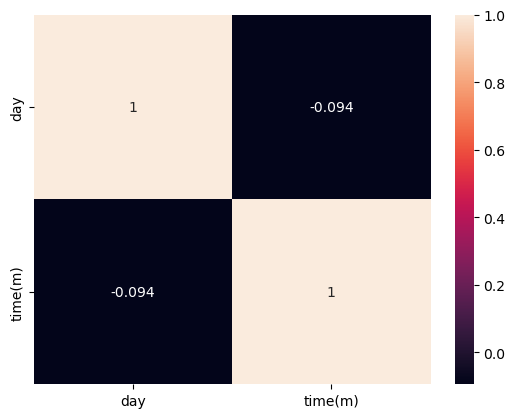

<Axes: >

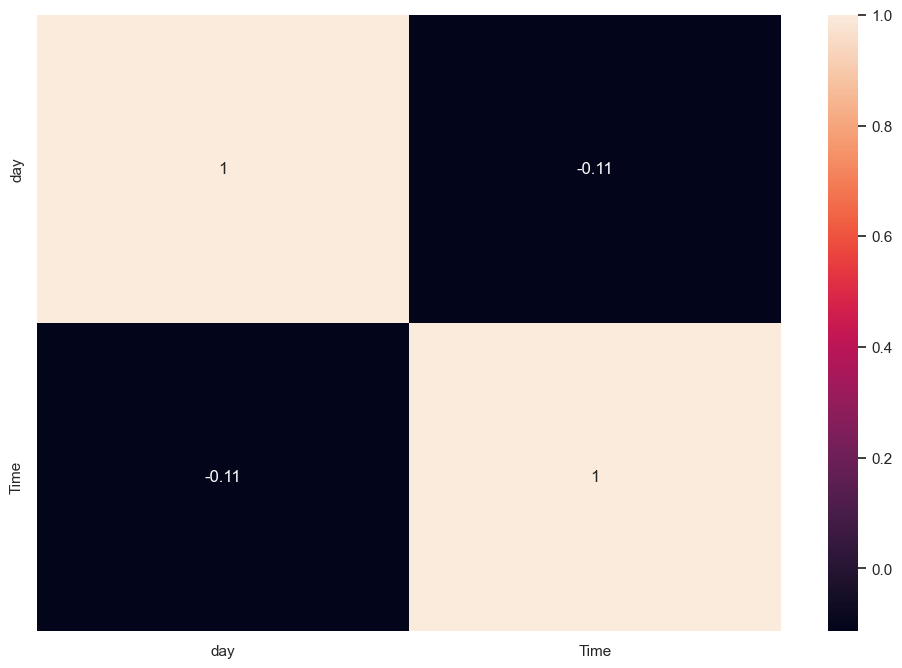

In [29]:
heat_map=df[['day', 'Time']].corr()
cols=['day', 'Time']
sns.heatmap(heat_map, annot=True)

### Your Reflection on the findings

Overall, based on my findings in this project so far, I have spent the most amount of time with English and Stats classes due to everything being due on the weekends. I was most engaged with Accounting and DS-160. When referencing the histogram I was able to use value counts to get this information. The box plot shows that Statistics class has outlier. My histogram was much more left skewed and using describe I was able to see the average time, which was 63 minutes. Finally, the heatmap was able to show a very weak negative correlation between time spent and time during the day.

### Submit the work by Friday 16th end of the day